# 製作trade-off 圖片

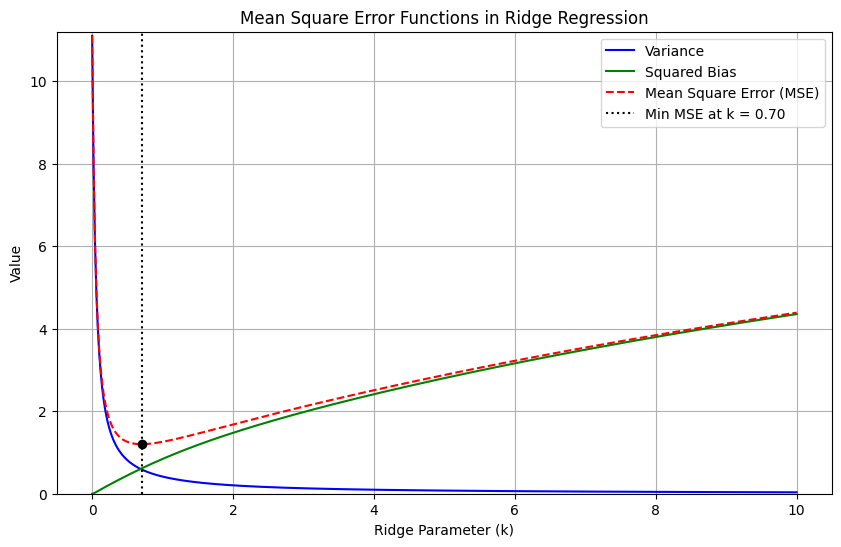

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma_squared = 1  # Variance of the error term
beta = np.array([3, 1.5, 0.5])  # True coefficients (example)
lambda_values = np.array([10, 1, 0.1])  # Eigenvalues of X'X (example values)

# Generate a range of k values
k_values = np.linspace(0, 10, 500)

# Calculate Variance, Squared Bias, and MSE for each k
variance = np.array([sigma_squared * np.sum(lambda_values / (lambda_values + k)**2) for k in k_values])
squared_bias = np.array([np.sum((k**2 * beta**2) / (lambda_values + k)**2) for k in k_values])
mse = variance + squared_bias

# Find the minimum MSE and the corresponding k value
min_mse_index = np.argmin(mse)
min_mse_k = k_values[min_mse_index]
min_mse_value = mse[min_mse_index]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, variance, label="Variance", color='blue')
plt.plot(k_values, squared_bias, label="Squared Bias", color='green')
plt.plot(k_values, mse, label="Mean Square Error (MSE)", color='red', linestyle='--')
plt.axvline(x=min_mse_k, color='black', linestyle=':', label=f"Min MSE at k = {min_mse_k:.2f}")
plt.scatter(min_mse_k, min_mse_value, color='black', zorder=5)  # Highlight the minimum MSE point

# Add labels and title
plt.xlabel("Ridge Parameter (k)")
plt.ylabel("Value")
plt.title("Mean Square Error Functions in Ridge Regression")
plt.legend()
plt.grid(True)
plt.ylim(0, max(mse) + 0.1)  # Proper scaling for better visualization
plt.show()


## Ridge trace

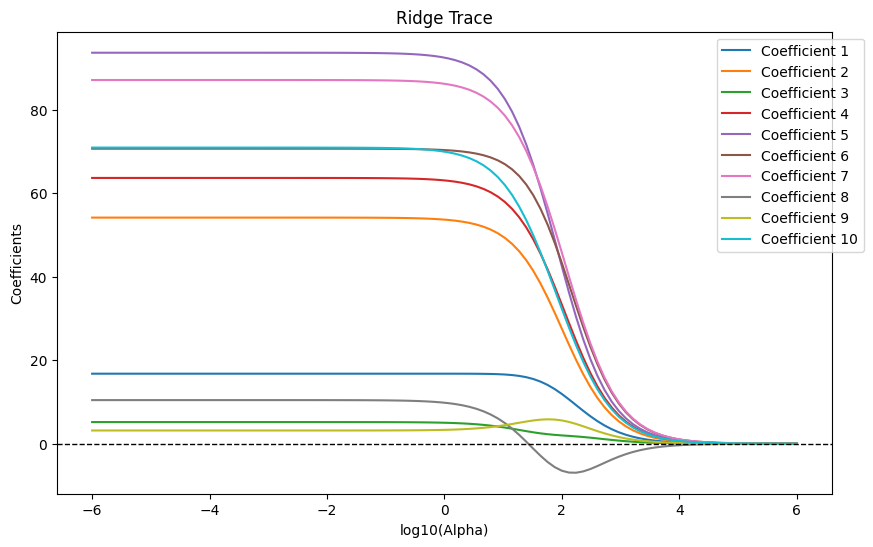

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
# Generate a regression dataset with multicollinearity
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
# Define the range of ridge parameters (k values)
alphas = np.logspace(-6, 6, 100)  # k values from 10^-6 to 10^6

# Initialize a matrix to store coefficients
coefs = []

# Loop over the range of alpha values
for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Convert list of coefficients to numpy array for easier plotting
coefs = np.array(coefs)
# Plotting the Ridge Trace
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(np.log10(alphas), coefs[:, i], label=f'Coefficient {i+1}')

plt.xlabel('log10(Alpha)')
plt.ylabel('Coefficients')
plt.title('Ridge Trace')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.show()
